In [1]:
%matplotlib inline
from collections import Counter
import import_ipynb
from process_data import get_stopwords, get_processed, get_originals
from matplotlib.cm import rainbow
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

importing Jupyter notebook from process_data.ipynb
['*The TV told me outside is dangerous*\n\n*The TV told me to stay in my home*\n\n*The TV told me human interaction bad*\n\n*The TV told me I can’t hang out with you*\n\n*The TV told me to call the cops if I see you with your friends*\n\n*The TV told me to trust no one*'
 "Iv'e linked a .io game from itch.io that's pretty relevant to society as we see it now. It blows my mind to see people have the news tell them how to feel/act. It's a flash game where you control the media and set the narrative for a social downfall.  \n\n[https://ncase.itch.io/wbwwb](https://ncase.itch.io/wbwwb)"
 'After all, the protest seemed it had no end in sight?\n\nhttps://old.reddit.com/r/AskReddit/comments/fpl9nn/hong_kong_protesters_how_is_it_going_on_the_front/'
 '""Bill Gates predicted this was going to happen" NO he KNEW this was going to happen and is about to Holocaust our asses thanks to you fools'
 'that witch has ties to so many celebrities probably

In [2]:
rand = 99402

Import processed data

In [3]:
statements = get_processed()  # holds cleaned text
originals = get_originals()   # holds original text

Convert the text data to numerical vectors with TF-IDF vectorization

In [4]:
vectorizer = TfidfVectorizer(stop_words=get_stopwords(), max_df=0.7, min_df=10)
X = vectorizer.fit_transform(statements)
print(len(vectorizer.vocabulary_))

7417


Represent high-dimensional vector data in 2D using PCA

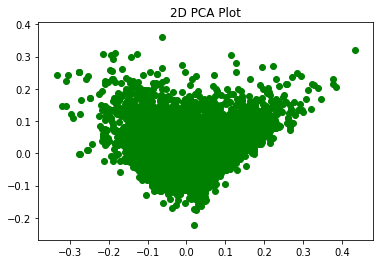

In [5]:
pca = PCA(random_state=rand).fit(X.todense())
X_2D = pca.transform(X.todense())

plt.title("2D PCA Plot")
plt.scatter(X_2D[:,0], X_2D[:,1], c='green')
plt.show()

# K-Means

Determine ideal k-value

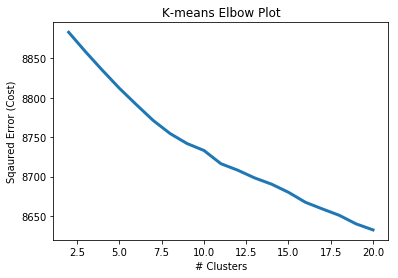

In [6]:
inertias = [] 
silhouettes = []
for i in range(2, 21): 
    km = KMeans(n_clusters=i, random_state=rand, max_iter=100) 
    km.fit(X)
    inertias.append(km.inertia_) 
    silhouettes.append(silhouette_score(X, labels=km.predict(X)))

plt.title("K-means Elbow Plot")
plt.plot(range(2, 21), inertias, linewidth ='3') 
plt.xlabel("# Clusters") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show()

In [7]:
# visually verify the elbow plot results here
N_CLUSTERS = silhouettes.index(max(silhouettes))

Perform K-means analysis

In [8]:
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=rand)
kmeans.fit(X)
print("K-means silhouette: ", silhouette_score(X, labels=kmeans.predict(X)))

K-means silhouette:  0.005880890288822682


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

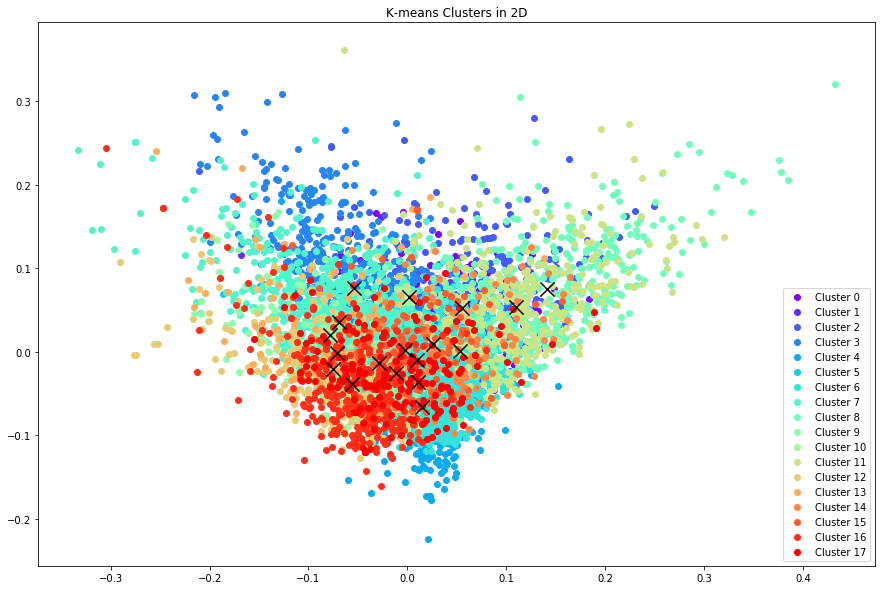

In [9]:
k_centers = pca.transform(kmeans.cluster_centers_)

fig, ax = plt.subplots(figsize=(15,10))
colors = rainbow(np.linspace(0,1,N_CLUSTERS))
for i in range(0,N_CLUSTERS):
    ix = np.where(kmeans.labels_ == i)
    ax.scatter(X_2D[ix,0], X_2D[ix,1], c=colors[i], label="Cluster "+str(i))
ax.legend(loc='lower right')
plt.scatter(k_centers[:,0], k_centers[:,1], 
            marker='x', s=200, linewidths=3, c='black')
plt.title("K-means Clusters in 2D")
plt.show() 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

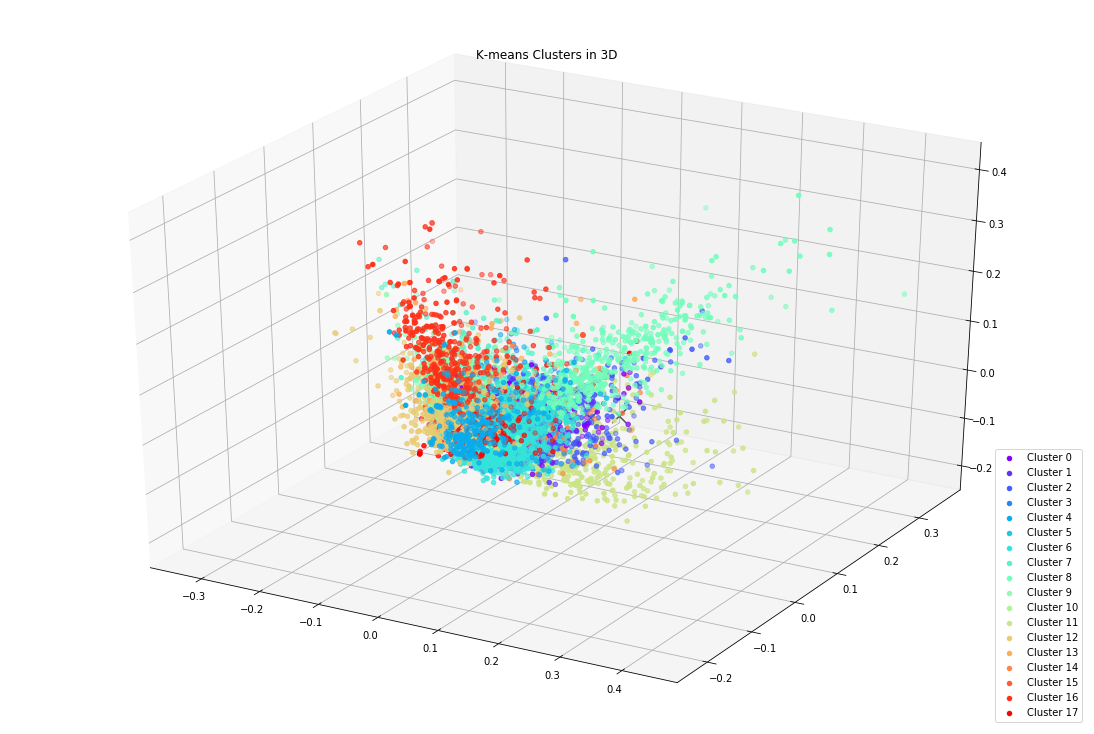

In [10]:
from mpl_toolkits.mplot3d import Axes3D
pca_3D = PCA(n_components=3, random_state=rand).fit(X.todense())
X_3D = pca.transform(X.todense())

fig = plt.figure(figsize=(15, 10))
ax = Axes3D(fig)
colors = rainbow(np.linspace(0,1,N_CLUSTERS))
for i in range(0,N_CLUSTERS):
    ix = np.where(kmeans.labels_ == i)
    ax.scatter(X_3D[ix,0], X_3D[ix,1], X_3D[ix,2], c=colors[i], label="Cluster "+str(i))
ax.legend(loc='lower right')
plt.scatter(k_centers[:,0], k_centers[:,1], 
            marker='x', s=200, linewidths=3, c='black')
plt.title("K-means Clusters in 3D")
plt.show() 

In [11]:
def get_clusters(cluster, labels):  
    indexes = np.where(labels == cluster)[0]
    return statements[indexes]

def most_common_words(cluster, labels, num):
    cluster_stmts = get_clusters(cluster, labels)
    words = [word for word in (stmt.split() for stmt in cluster_stmts)]
    words = [list(set(sentence)) for sentence in words]
    words = sum(words, [])
    count = Counter(words)
    return count.most_common(num)

Print the most commonly appearing words per cluster 
(each word is counted once per document)

In [12]:
for i in range(0, N_CLUSTERS):
    print("CLUSTER ", i, most_common_words(i, kmeans.labels_, 20))
    print()

CLUSTER  0 [('guy', 287), ('go', 77), ('look', 75), ('want', 69), ('say', 69), ('time', 68), ('get', 67), ('post', 66), ('talk', 65), ('make', 56), ('woman', 55), ('day', 54), ('start', 52), ('conspiracy', 51), ('come', 51), ('work', 49), ('year', 47), ('thought', 47), ('never', 46), ('well', 46)]

CLUSTER  1 [('alien', 79), ('moon', 74), ('area', 46), ('51', 41), ('time', 39), ('believe', 34), ('land', 32), ('earth', 31), ('look', 30), ('want', 30), ('ufo', 28), ('human', 26), ('go', 25), ('space', 25), ('actually', 25), ('government', 25), ('year', 25), ('come', 24), ('make', 24), ('new', 23)]

CLUSTER  2 [('conspiracy', 425), ('theory', 236), ('believe', 89), ('want', 82), ('look', 78), ('go', 72), ('talk', 70), ('time', 69), ('come', 68), ('post', 65), ('good', 63), ('say', 61), ('theorist', 61), ('world', 60), ('thought', 58), ('use', 57), ('thing', 55), ('lot', 54), ('sub', 53), ('make', 52)]

CLUSTER  3 [('time', 371), ('world', 357), ('human', 316), ('life', 299), ('come', 295)

Print the words nearest the cluster centers

In [13]:
nearest = kmeans.cluster_centers_.argsort()[:, ::-1] 
labels = {v: k for k, v in vectorizer.vocabulary_.items()}
for cluster in range(N_CLUSTERS):
    print("Cluster %d words:" % cluster)
    
    for i in nearest[cluster, :10]: 
        print(i, labels[i])
    print() 

Cluster 0 words:
3110 guy
7327 woman
6589 talk
4037 look
7200 want
5136 post
4240 men
6703 thought
7337 work
1810 day

Cluster 1 words:
4400 moon
440 alien
191 51
601 area
6924 ufo
3864 land
4475 nasa
2265 earth
6233 space
328 actually

Cluster 2 words:
1564 conspiracy
6682 theory
856 believe
6680 theorist
6422 sub
6589 talk
4037 look
3021 good
6703 thought
7200 want

Cluster 3 words:
3321 human
3014 god
7340 world
3968 life
6737 time
2265 earth
1430 come
856 believe
5471 reality
6997 universe

Cluster 4 words:
2447 epstein
3727 jeffrey
6469 suicide
3818 kill
1355 clinton
4918 pedophile
3694 island
4469 name
1183 case
5229 prison

Cluster 5 words:
7275 white
921 black
492 american
5411 race
7327 woman
3307 house
491 america
390 african
1430 come
5415 racist

Cluster 6 words:
4037 look
6703 thought
6737 time
7053 use
7387 year
7200 want
3135 happen
1430 come
2746 find
6589 talk

Cluster 7 words:
3031 government
7340 world
7200 want
1681 country
4387 money
1615 control
6335 state
7053 us

In [14]:
for i in range(0, N_CLUSTERS):
    print("Size of CLUSTER ", i, ": ", len(get_clusters(i, kmeans.labels_)))

Size of CLUSTER  0 :  322
Size of CLUSTER  1 :  161
Size of CLUSTER  2 :  454
Size of CLUSTER  3 :  676
Size of CLUSTER  4 :  310
Size of CLUSTER  5 :  137
Size of CLUSTER  6 :  3527
Size of CLUSTER  7 :  1082
Size of CLUSTER  8 :  451
Size of CLUSTER  9 :  243
Size of CLUSTER  10 :  17
Size of CLUSTER  11 :  384
Size of CLUSTER  12 :  353
Size of CLUSTER  13 :  102
Size of CLUSTER  14 :  131
Size of CLUSTER  15 :  159
Size of CLUSTER  16 :  362
Size of CLUSTER  17 :  194


# Hierarchical Clustering

Create linkage matrix from data

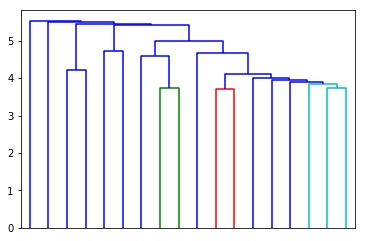

In [15]:
linkage_matrix = linkage(X.toarray(), 'ward')
den = dendrogram(linkage_matrix, orientation='top', p=N_CLUSTERS, 
                 truncate_mode='lastp', show_leaf_counts=False)

In [16]:
fc = fcluster(linkage_matrix, N_CLUSTERS, criterion='maxclust')
print("Silhouette: ", silhouette_score(X, labels=fc))

Silhouette:  -0.0029004824431535215


Print the most commonly appearing words per cluster 
(each word is counted once per document)

In [17]:
for i in range(0, N_CLUSTERS):
    print("CLUSTER ", i, most_common_words(i+1, fc, 20))
    print()

CLUSTER  0 [('gt', 42), ('1', 19), ('come', 19), ('2', 19), ('year', 18), ('3', 17), ('right', 16), ('new', 16), ('use', 16), ('say', 15), ('look', 15), ('may', 14), ('world', 14), ('go', 14), ('state', 14), ('post', 14), ('day', 13), ('put', 13), ('point', 13), ('time', 13)]

CLUSTER  1 [('mass', 17), ('awareness', 17), ('field', 17), ('mother', 17), ('great', 17), ('demon', 17), ('flower', 17), ('try', 17), ('awaken', 17), ('higher', 17), ('hand', 17), ('another', 17), ('talk', 17), ('call', 17), ('anatomy', 17), ('suggest', 17), ('page', 17), ('entity', 17), ('current', 17), ('part', 17)]

CLUSTER  2 [('kong', 62), ('hong', 62), ('china', 30), ('government', 30), ('happen', 29), ('chinese', 28), ('death', 28), ('revolutionary', 27), ('mass', 27), ('million', 23), ('revolution', 22), ('world', 21), ('right', 20), ('use', 20), ('murder', 20), ('go', 20), ('protest', 19), ('war', 19), ('police', 19), ('entire', 19)]

CLUSTER  3 [('virus', 99), ('china', 96), ('chinese', 50), ('make', 4

In [18]:
for i in range(1, N_CLUSTERS + 1):
    print("Size of CLUSTER ", i-1, ": ", len(get_clusters(i, fc)))

Size of CLUSTER  0 :  42
Size of CLUSTER  1 :  17
Size of CLUSTER  2 :  69
Size of CLUSTER  3 :  139
Size of CLUSTER  4 :  167
Size of CLUSTER  5 :  424
Size of CLUSTER  6 :  160
Size of CLUSTER  7 :  31
Size of CLUSTER  8 :  454
Size of CLUSTER  9 :  60
Size of CLUSTER  10 :  61
Size of CLUSTER  11 :  637
Size of CLUSTER  12 :  8
Size of CLUSTER  13 :  157
Size of CLUSTER  14 :  18
Size of CLUSTER  15 :  5094
Size of CLUSTER  16 :  303
Size of CLUSTER  17 :  1224


In [20]:
for i in range(0, 15):
    print(originals[i])
    print("K-means: ", kmeans.labels_[i])
    print("Hierarchical: ", fc[i]-1)
    print("\n-------------\n")

*The TV told me outside is dangerous*

*The TV told me to stay in my home*

*The TV told me human interaction bad*

*The TV told me I can’t hang out with you*

*The TV told me to call the cops if I see you with your friends*

*The TV told me to trust no one*
K-means:  6
Hierarchical:  15

-------------

Iv'e linked a .io game from itch.io that's pretty relevant to society as we see it now. It blows my mind to see people have the news tell them how to feel/act. It's a flash game where you control the media and set the narrative for a social downfall.  

[https://ncase.itch.io/wbwwb](https://ncase.itch.io/wbwwb)
K-means:  6
Hierarchical:  15

-------------

After all, the protest seemed it had no end in sight?

https://old.reddit.com/r/AskReddit/comments/fpl9nn/hong_kong_protesters_how_is_it_going_on_the_front/
K-means:  6
Hierarchical:  17

-------------

""Bill Gates predicted this was going to happen" NO he KNEW this was going to happen and is about to Holocaust our asses thanks to yo